In [1]:
import numpy as np
import pandas as pd

In [6]:
x = np.array([[0,0,0],
                     [0,0,1],
                     [0,1,0],
                     [1,1,0],
                     [1,0,1],
                     [1,1,1]])

y = np.array([[0],
             [1],
             [1],
             [0],
             [0],
             [1]])

In [7]:
y

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [9]:
xd = pd.DataFrame(x, columns=["a", "b", "c"])
yd = pd.DataFrame(y, columns=["o/p"])
table = pd.concat([xd,yd], axis=1)
table

,a,b,c,o/p
0,0,0,0,0
1,0,0,1,1
2,0,1,0,1
3,1,1,0,0
4,1,0,1,0
5,1,1,1,1


In [10]:
# Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Transfer Derivative
def dsigmoid(x):
    return x * (1 - x)

In [12]:
def feed_forward(x, w0, w1):
    # Input Layer
    layer0 = x
    
    # Hidden Layer
    z1 = np.dot(layer0, w0)
    layer1 = sigmoid(z1)
    
    # Output Layer
    layer2 = sigmoid(np.dot(layer1, w1))
    
    return layer0, layer1, layer2
    
    

In [22]:
def backpropogate(i, layer0, layer1, layer2, w0, w1, y, lr):
    # Layer 2 (Output Layer)
    l2_error = layer2 - y
    
    l2_delta = l2_error * dsigmoid(layer2)
    
    l2_grad = np.dot(layer1.T, l2_delta)
    
    # Layer 1 (Hidden Layer)
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    l1_grad = np.dot(layer0.T, l1_delta)
    
    w1 = w1 - (l2_grad * lr)
    w0 = w0 - (l1_grad * lr)
    
    loss = np.mean(np.power(l2_error, 2))
    loss_curve.append(loss)
    
    if i%1000 ==0:
        print(loss)
        
    return w0, w1 
        
        
    

In [27]:
w0 = np.random.random((3,4))
w1 = np.random.random((4,1))

loss_curve = []
iterations = range(10000)
lr = 0.01

In [28]:
for j in iterations:
    a0, a1, a2 = feed_forward(x, w0, w1)
    w0, w1 = backpropogate(j, a0, a1, a2, w0, w1, y, lr)

0.30353892197237614
0.24713052633346008
0.2407968706979252
0.2269989253627405
0.1979262550761567
0.15061822572002262
0.10137781509044623
0.06666901266201442
0.04551246445131998
0.032608291770952334


In [29]:
ip, hd, op = feed_forward(x, w0, w1)

In [30]:
op

array([[0.233899  ],
       [0.87742555],
       [0.88760014],
       [0.12522451],
       [0.12550398],
       [0.81880345]])

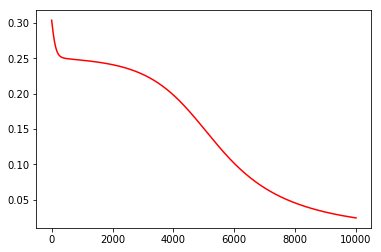

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(iterations, loss_curve, 'r')